<a href="https://colab.research.google.com/github/masrathsyed/spark/blob/main/dy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.support vector classifier (svc model)
#dataset - fake and real news dataset
#dataset - https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv

In [ ]:
#2.create dataframe
import pandas as pd
df = pd.read_csv('/content/fake_or_real_news.csv.zip')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.shape

(6335, 4)

In [ ]:
df.size

25340

In [ ]:
#3.how many spam ham msgs
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

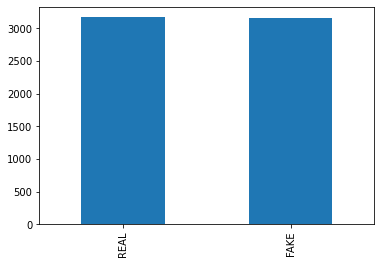

In [ ]:
df['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 4.divide data input and output
x = df.iloc[:,1].values
y = df.iloc[:,3].values
print(x)
print(y)

['You Can Smell Hillary’s Fear'
 'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)'
 'Kerry to go to Paris in gesture of sympathy' ...
 'Anti-Trump Protesters Are Tools of the Oligarchy     : Information'
 'In Ethiopia, Obama seeks progress on peace, security in East Africa'
 "Jeb Bush Is Suddenly Attacking Trump. Here's Why That Matters"]
['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']


In [ ]:
#5.train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
#6.apply tf idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [ ]:
#7.apply classifier/regressor/cluster
from sklearn.svm import SVC
model = SVC()

In [ ]:
#8.model fitting
model.fit(x_train_v,y_train)

SVC()

In [ ]:
#9.predictor variable/predict the output
y_pred = model.predict(x_test_v)
y_pred

array(['REAL', 'REAL', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [ ]:
y_pred

array(['REAL', 'REAL', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [ ]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
#10.accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

82.00757575757575

In [ ]:
#11.evaluate a specific range
a = df['text'][10]
a

'CEDAR RAPIDS, Iowa — “I had one of the most wonderful rallies of my entire career right here in 1992,” Bill Clinton said by way of opening to the crowd of more than 1,100 on Saturday night.\n\nTwo days before the Iowa caucuses, Cedar Rapids tried to deliver that same old feeling to his wife, Hillary Clinton.\n\nIn the crowd,\xa0one woman held a sign that said “227 years of men. It’s HER turn!" Some carried signs and books. Others had traveled from as far as Missouri. They had waited hours, even after the fire marshal told them there was no more room inside the high school gymnasium.\n\nThe restive crowd chanted slogans and buzzed with anticipation until finally Bill, Hillary and Chelsea Clinton all appeared on stage hand-in-hand, an hour behind schedule. As they roared, Hillary Clinton beamed.\n\nIt has been a long slog in Iowa for the Clinton campaign, which has struggled mightily to shake the label that its supporters can’t muster the enthusiasm of its rival’s backers. As the caucus

In [ ]:
a = vect.transform([a])
model.predict(a)

array(['REAL'], dtype=object)

In [ ]:
b = df['text'][12]
b

"Click Here To Learn More About Alexandra's Personalized Essences Psychic Protection Click Here for More Information on Psychic Protection! Implant Removal Series Click here to listen to the IRP and SA/DNA Process Read The Testimonials Click Here To Read What Others Are Experiencing! Copyright © 2012 by Galactic Connection. All Rights Reserved. \nExcerpts may be used, provided that full and clear credit is given to Alexandra Meadors and www.galacticconnection.com with appropriate and specific direction to the original content. Unauthorized use and/or duplication of any material on this website without express and written permission from its author and owner is strictly prohibited. Thank you. \nPrivacy Policy \nBy subscribing to GalacticConnection.com you acknowledge that your name and e-mail address will be added to our database. As with all other personal information, only working affiliates of GalacticConnection.com have access to this data. We do not give GalacticConnection.com addr

In [ ]:
b = vect.transform([b])
model.predict(b)

array(['FAKE'], dtype=object)

In [ ]:
#12.evaluating by  custom texts
c = 'Barackobama administration'
c

'Barackobama administration'

In [ ]:
c = vect.transform([c])
model.predict(c)


array(['FAKE'], dtype=object)

In [ ]:
#1.gather data and divide into i/p o/p
#2.Applied train_test_split
#3.AppliedTfidfVectorizer
#4.Apply SVC
#5.predicted output

In [ ]:
#if i have to deploy mymodel,perform pipelining
#pipelining - combining of 2 or more modules
#so here we want to combine/pipeline TidfVectorizer and svc

In [ ]:
#pipelining
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
#predictor variable
y_pred1 = text_model.predict(x_test)
y_pred1#predicted outputs for pipeline model

array(['REAL', 'REAL', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [ ]:
y_test#Actual output

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [ ]:
#t check accuracy of pipeline model
accuracy_score(y_pred1,y_test)*100

82.00757575757575

In [ ]:
#individual prediction/evaluation of a specific range
a1 = df['text'][2]
a1

'U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.\n\nThe visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.\n\nThe French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing on a country, 

In [ ]:
text_model.predict([a1])

array(['REAL'], dtype=object)

In [ ]:
#joblib - 2 diferent types - 1.dump and 2.load
import joblib
joblib.dump(text_model,'fake--real')
#we are creating a new file called spam-ham and dumping our pipelined model
#inside it

['fake--real']